In [1]:
import netCDF4
import numpy as np
import os
import matplotlib.pyplot as plt
import cv2
from utils.image_transform import crop_center_square, transform_color, resize_image
from patchify import patchify
from datetime import timedelta
import pandas as pd
import os

In [2]:
ir_dir = 'E:/polar/code/data/flight9/IRdata_ATWAICE_processed_220718_142920.nc'
#### Convert netcdf data to numpy array ####
ds = netCDF4.Dataset(ir_dir)
imgs = ds.variables['Ts'][:]
timestamps = ds.variables['time'][:]

In [12]:
print(ds)

plt.pcolormesh()

<class 'netCDF4._netCDF4.Dataset'>
root group (NETCDF4 data model, file format HDF5):
    Title: UB IR Camera images
    Institution: University of Bremen
    PI_name: Dr. Gunnar Spreen
    Product_name: Thermal infrared sea ice surface temperature images
    Description: This data is processed during the PS131 ATWAICE Campaign.
    Date: 2022-07-18 00:00:00
    dimensions(sizes): x(480), y(640), t(4989)
    variables(dimensions): |S1 crs(), float32 Ts(t, x, y), float32 lon(t), float32 lat(t), float32 time(t), float32 roll(t), float32 pitch(t), float32 altitude(t), float32 ix(t), float32 heading(t), float32 mss(t), float32 xd(t, x, y), float32 yd(t, x, y), float32 grad(x, y)
    groups: 


In [3]:
def extract_time(img_idx, timestamps, flight_nr):
    """
    Convert the timestamp for an image.

    Parameters:
    ----------
        img_idx : int
        timestamps : numpy.ma.core.MaskedArray
    """
    
    if flight_nr == 9:
        reference = '2022-07-18 00:00:00'
    elif flight_nr == 16:
        reference = '2022-07-30 00:00:00'

    times = pd.Series(timestamps)
    date = pd.Timestamp(reference)
    time = str(date + timedelta(seconds=int(times[img_idx])))

    return time

In [4]:
def extract_single(dataset, idx, time, flight_nr, save_path= None):
    # extracts image in squared shape

    timestamp = extract_time(idx, time, flight_nr).replace(' ','_').replace(':','').replace('-','')
    img = dataset[idx]
    img = crop_center_square(img)

    # clip for better visibility, use 272,274 for flight 16
    img = np.clip(img, 272.5, 274)
    plt.imshow(img)

    print(timestamp)

    #plt.imsave(os.path.join(save_path, '{}_{}.png'.format(timestamp,idx)), img, cmap='cividis')

20220718_151510
20220718_151434
20220718_151518
20220718_151602
20220718_151610
20220718_152002
20220718_153634
20220718_153938
20220718_155102
20220718_145318


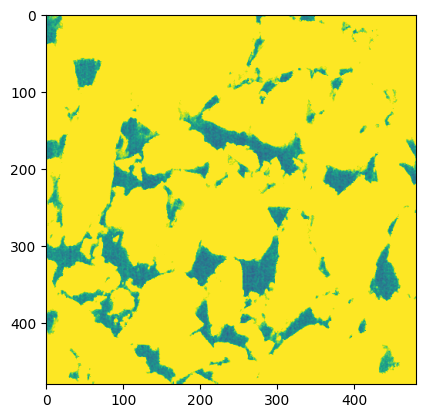

In [5]:
l = [2416, 2380, 2424, 2468, 2476, 2708, 3700, 3884, 4568, 1104]

for i in l: 
    extract_single(imgs, i, timestamps, 9)

In [7]:
# undistort ir images
# load corresponding vis images

# normalization within model: add (5?) coefficients such that model learn to normalize / invert images with reverse temperatures.
# Steps: 1) find out how many coefficients (1-x*temperature)
# 2) Integrate in model architecture as uniform transformation something (such that applied to all pixels equally)

255
0
78.85547309027778
255
0
96.58884114583333
249
3
85.93037760416667
255
0
96.7936892361111
255
0
72.5904296875
255
0
89.01663194444444
255
0
67.92329861111111
255
0
93.03786024305556
255
0
109.71815972222223
255
0
104.52164930555556
255
0
74.30360677083333
255
0
165.39892795138888
255
0
99.05312934027778


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


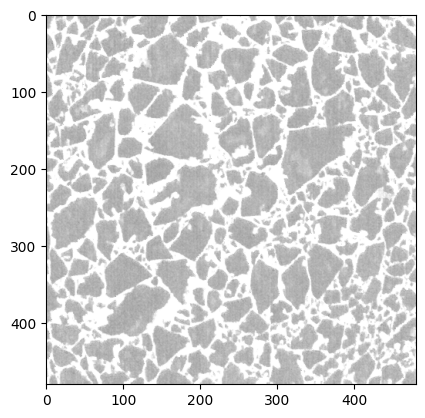

In [46]:
im = cv2.imread("E:/polar/code/data/ir/entire/original_size/ims_raw_extended/8.png")

im = im / 255

x1 = 1
x2 = 1
x3 = 0.5

im1 = (1 - x1) * im + x1 * (1 - x2 * im + x3)

plt.imshow(im1)